In [2]:
!pip install seaborn

     |████████████████████████████████| 283 kB 16.7 MB/s eta 0:00:01
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Reading all the tables we need.

In [4]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
genders = pd.read_csv('gender_submission.csv')

## Data Exploration

In [5]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_csv.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### Proportion of values missing from our dataset.

In [8]:
total_null = train_csv.isnull().sum().sort_values(ascending = False)
percent = train_csv.isnull().sum() / train_csv.isnull().count() * 100
percent2 = (round(percent, 1)).sort_values(ascending = False)
missing_data = pd.concat([total_null, percent2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [9]:
train_csv.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

/opt/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


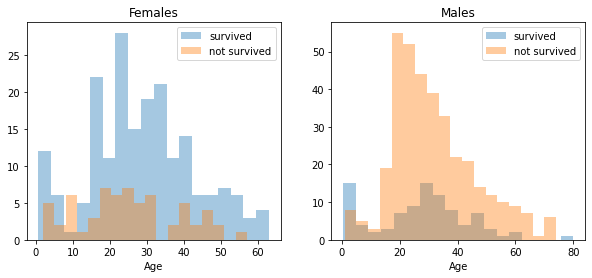

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
women = train_csv[train_csv['Sex'] == 'female']
survived_women = women[women['Survived'] == 1]
not_survived_women = women[women['Survived'] == 0]
ax = sns.distplot(survived_women.Age.dropna(), bins = 18, label='survived', ax = axes[0], kde = False)
ax = sns.distplot(not_survived_women.Age.dropna(), bins = 18, label='not survived', ax = axes[0], kde = False)
ax.set_title('Females')
ax.legend()

men = train_csv[train_csv['Sex'] == 'male']
survived_men = men[men['Survived'] == 1]
not_survived_men = men[men['Survived'] == 0]
ax = sns.distplot(survived_men.Age.dropna(), bins = 18, label='survived', ax = axes[1], kde = False)
ax = sns.distplot(not_survived_men.Age.dropna(), bins = 18, label='not survived', ax = axes[1], kde = False)
ax.set_title('Males')
ax.legend()


/opt/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


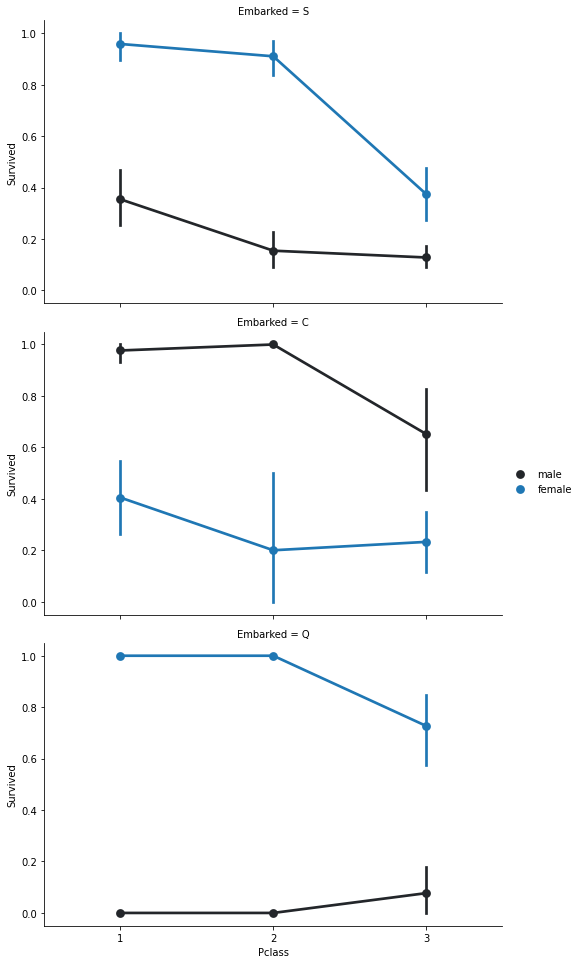

In [11]:
FacetGrid = sns.FacetGrid(train_csv, row = 'Embarked', size = 4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

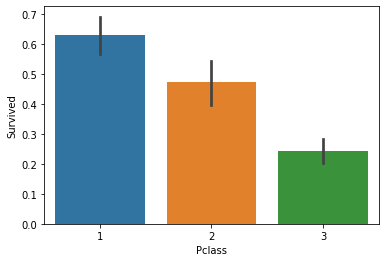

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train_csv)

/opt/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


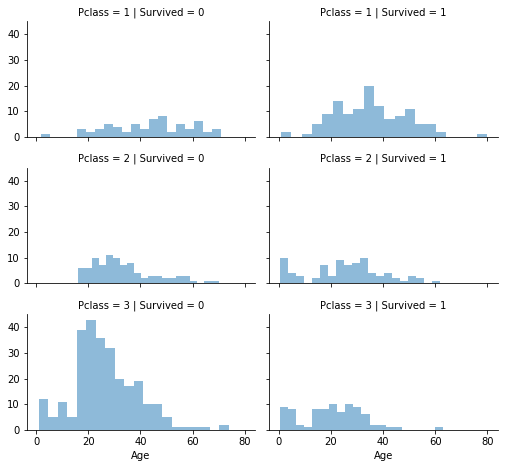

In [13]:
grid = sns.FacetGrid(train_csv, col="Survived", row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins = 20)
grid.add_legend()

In [14]:
data = [train_csv, test_csv]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_csv['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/opt/venv/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


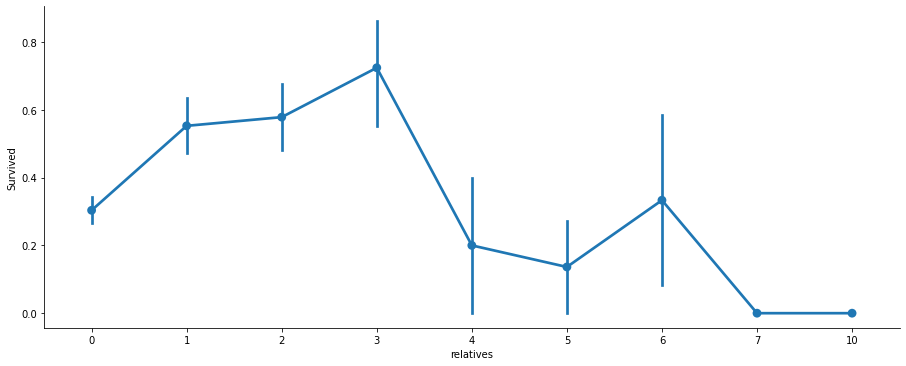

In [15]:
axes = sns.factorplot('relatives', 'Survived', data=train_csv, aspect=2.5)

## Data Cleaning

In [16]:
train_csv = train_csv.drop(['PassengerId'], axis=1)

#### Assigning values to decks.

In [17]:
import re
deck_dict = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_csv, test_csv]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck_dict)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train_csv = train_csv.drop(['Cabin'], axis = 1)
test_csv = test_csv.drop(['Cabin'], axis = 1)

#### Filtering out null ages.

In [18]:
data = [train_csv, test_csv]

for dataset in data:
    mean = train_csv["Age"].mean()
    std = test_csv["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    #compute random numbers between the mean, std, and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_csv["Age"].astype(int)

train_csv["Age"].isnull().sum()

0

#### Resolving the 2 missing values in 'Embarked'

In [19]:
train_csv['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
common_value = 'S'
data = [train_csv, test_csv]
for dataset in data:
    dataset['Embarked'] = dataset["Embarked"].fillna(common_value)

#### Converting features

In [22]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


##### Fares:

In [23]:
data = [train_csv, test_csv]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

##### Name:

In [25]:
data = [train_csv, test_csv]
titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    # replace titles with a more commone title or as rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_csv = train_csv.drop(['Name'], axis = 1)
test_csv = test_csv.drop(['Name'], axis = 1)

##### Sex:

In [28]:
genders = {'male': 0, 'female': 1}
data = [train_csv, test_csv]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

##### Ticket:

In [35]:
train_csv['Ticket'].describe()

train_csv = train_csv.drop(['Ticket'], axis=1)
test_csv = test_csv.drop(['Ticket'], axis=1)

##### Embarked:

In [42]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data = [train_csv, test_csv]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)



## Creating Categories

In [43]:
data = [train_csv, test_csv]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

##### Fare:

In [44]:
train_csv.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,0,1,0,7,NaN,1,0,8,1
1,1,1,1,0,1,0,71,NaN,1,0,3,3
2,1,3,1,0,0,0,7,NaN,0,1,8,2
3,1,1,1,0,1,0,53,NaN,1,0,3,3
4,0,3,0,0,0,0,8,NaN,0,1,8,1
5,0,3,0,0,0,0,8,NaN,0,1,8,1
6,0,1,0,0,0,0,51,NaN,0,1,5,1
7,0,3,0,0,3,1,21,NaN,4,0,8,4
8,1,3,1,0,0,2,11,NaN,2,0,8,3
9,1,2,1,0,1,0,30,NaN,1,0,8,3


In [45]:
data = [train_csv, test_csv]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

## Creating New Features

#### Age times Class

In [46]:
data = [train_csv, test_csv]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

#### Fare per Person

In [47]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [49]:
train_csv.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,0,1,0,0,NaN,1,0,8,1,0,0
1,1,1,1,0,1,0,3,NaN,1,0,3,3,0,1
2,1,3,1,0,0,0,0,NaN,0,1,8,2,0,0
3,1,1,1,0,1,0,3,NaN,1,0,3,3,0,1
4,0,3,0,0,0,0,1,NaN,0,1,8,1,0,1
5,0,3,0,0,0,0,1,NaN,0,1,8,1,0,1
6,0,1,0,0,0,0,3,NaN,0,1,5,1,0,3
7,0,3,0,0,3,1,2,NaN,4,0,8,4,0,0
8,1,3,1,0,0,2,1,NaN,2,0,8,3,0,0
9,1,2,1,0,1,0,2,NaN,1,0,8,3,0,1


## Building Machine Learning Models

In [51]:
X_train = train_csv.drop("Survived", axis = 1)
Y_train = train_csv['Survived']
X_test = test_csv.drop('PassengerId', axis = 1).copy()

##### Stochastic Gradient Descent (SGD)

In [52]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').